<a href="https://www.kaggle.com/code/chaser260/predicting-student-success?scriptVersionId=140523900" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Introduction
The ultimate goal of higher education institutions is to prepare students for successful careers and graduate highly qualified candidates into the workforce for the betterment of society. Unfortunately, there are many obstacles and barriers to accomplishing this goal. As of 2021, only 33.7% of the population aged 25 and over have completed a bachelor’s degree or higher in the U.S. (US Census Bureau, 2022), while total enrollment has declined by 1.3 million students at public colleges and universities in the United States between 2010 and 2020 (Ma & Pender, 2022). One of the biggest problems that higher education institutions face is student dropout rates. Of all the students that enroll in a college institution, more than half fail to complete their degree (Kantrowitz, 2021). Understanding the reasons why is a crucial first step toward addressing the problem and improving graduation rates.

Early detection and intervention for students at risk of dropping out can significantly improve their chances of success. Armed with the right information, educational decision-makers can help provide the right resources at the right time to the students who need them. In addition, institutions can use this data to make changes to university operations that can help facilitate improved graduation rates, such as introducing hybrid and online learning models, DEI initiatives, or the reallocation of resources.

A machine learning model that accurately predicts whether a student will drop out or graduate can provide necessary insights and recommendations that enable universities to address the issues causing students to drop out and develop strategies to improve student success. In the following analysis, I will be using a Kaggle dataset made available by [Kancharla Naveen Kumar](https://www.kaggle.com/naveenkumar20bps1137) to analyze student success factors and develop multiple supervised machine learning models, including Logistic Regression, Decision Trees, and Random Forest, to predict students who are likely to drop out.


# Preliminaries

## Date & Time

In [1]:
from datetime import datetime as dt 
now = dt.now()
print("Analysis on", now.strftime('%Y-%m-%d'), "at", now.strftime('%H:%M %p'))

Analysis on 2023-08-21 at 04:37 AM


## Current Working Directory

In [2]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/predict-students-dropout-and-academic-success/dataset.csv


## Import Libraries

Importing the following standard libraries to support the analysis. Sklearn libraries will be imported when new models are introduced.

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
# Used to ignore warning messages about future deprecations and improve readability
warnings.filterwarnings('ignore') 

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# About the Data

## Description

This dataset created from a higher education institution (acquired from several disjoint databases) related to students enrolled in different undergraduate degrees, such as agronomy, design, education, nursing, journalism, management, social service, and technologies. The dataset includes information known at the time of student enrollment (academic path, demographics, and social-economic factors) and the students' academic performance at the end of the first and second semesters. The data is used to build classification models to predict students' dropout and academic success. The problem is formulated as a three-category classification task, in which there is a strong imbalance towards one of the classes.

Data Source: https://www.kaggle.com/datasets/naveenkumar20bps1137/predict-students-dropout-and-academic-success?select=dataset.csv

License: CC0: Public Domain

## Import Data

In [4]:
df = pd.read_csv('/kaggle/input/predict-students-dropout-and-academic-success/dataset.csv')
df.head()


,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,5,1,1,1,22,27,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,8,2,15,1,1,1,23,27,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,12,1,3,0,1,1,22,28,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


View the dimensions of the data

In [5]:
df.shape

(4424, 35)

The data frame contains 4,424 rows and 35 columns.

# Preprocessing

Renaming column from 'Nacionality' to 'Nationality':

In [6]:
df.rename(columns={'Nacionality': 'Nationality'}, inplace=True)

## Data Description

Familiarize with basic statistics.

In [7]:
df.describe().round(3)

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nationality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,4424.000,4424.000,4424.000,4424.000,4424.000,4424.000,4424.000,4424.000,4424.000,4424.000,...,4424.000,4424.000,4424.000,4424.000,4424.000,4424.000,4424.000,4424.000,4424.000,4424.000
mean,1.179,6.887,1.728,9.899,0.891,2.531,1.255,12.322,16.455,7.318,...,0.138,0.542,6.232,8.063,4.436,10.230,0.150,11.566,1.228,0.002
std,0.606,5.299,1.314,4.332,0.312,3.964,1.748,9.026,11.045,3.998,...,0.691,1.919,2.196,3.948,3.015,5.211,0.754,2.664,1.383,2.270
min,1.000,1.000,0.000,1.000,0.000,1.000,1.000,1.000,1.000,1.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,7.600,-0.800,-4.060
25%,1.000,1.000,1.000,6.000,1.000,1.000,1.000,2.000,3.000,5.000,...,0.000,0.000,5.000,6.000,2.000,10.750,0.000,9.400,0.300,-1.700
50%,1.000,8.000,1.000,10.000,1.000,1.000,1.000,13.000,14.000,6.000,...,0.000,0.000,6.000,8.000,5.000,12.200,0.000,11.100,1.400,0.320
75%,1.000,12.000,2.000,13.000,1.000,1.000,1.000,22.000,27.000,10.000,...,0.000,0.000,7.000,10.000,6.000,13.333,0.000,13.900,2.600,1.790
max,6.000,18.000,9.000,17.000,1.000,17.000,21.000,29.000,34.000,32.000,...,12.000,19.000,23.000,33.000,20.000,18.571,12.000,16.200,3.700,3.510


View data types.

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 35 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance                      4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Nationality                                     4424 non-null   int64  
 7   Mother's qualification                          4424 non-null   int64  
 8   Father's qualification                          4424 non-null   int64  
 9   Mother's occupation                      

All variables are numeric except for the target variable, which is non-numeric categorical. Will need to convert Target to numeric after exploring the dataset, prior to applying ML models.

## Missing Data

Use .isna() function to search for any missing data prior to analysis.

In [9]:
print(df.isna().sum())
print('Total Missing: ', df.isna().sum().sum())

Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance                        0
Previous qualification                            0
Nationality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrollment                                 0
International                                     0
Curricular u

## Duplicates

In [10]:
print('Total Duplicates: ', df.duplicated().sum())

Total Duplicates:  0


There are no duplicate rows.

# Data Exploration

Check the distribution of the target variable.

In [11]:
df['Target'].value_counts()

Graduate    2209
Dropout     1421
Enrolled     794
Name: Target, dtype: int64

<Axes: xlabel='Target', ylabel='count'>

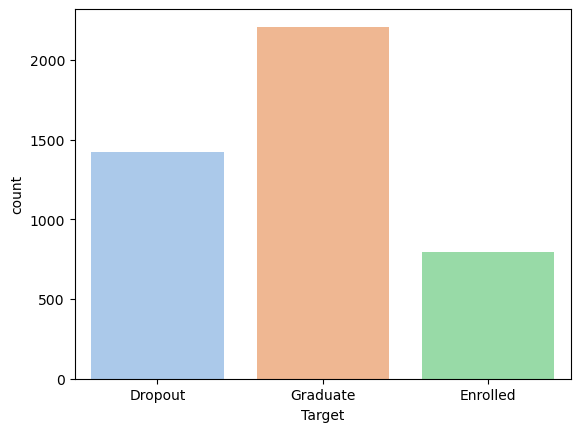

In [12]:
sns.countplot(df, x='Target', palette='pastel')

To ensure each feature is analyzed in terms of students who graduate or drop out only, the 'Enrolled' classification will be dropped from the analysis. Because students who are labelled as "enrolled" still have the opportunity to drop out during their program, whether they drop out or graduate is unknown.

Drop 'Enrolled' status.

In [13]:
df = df[df.Target != 'Enrolled']

Verify updated shape:

In [14]:
df.shape

(3630, 35)

After dropping 'Enrolled' values the data frame was reduced from 4424 rows to 3630 rows.

## Target Distribution

Next, I will take a look at the current distribution of the target variable with a frequency distribution table and corresponding bar chart. 

In [15]:
# Create data frame containing % of total column
freq_distribution = pd.DataFrame(df['Target'].value_counts())
freq_distribution['% of Total'] = round((freq_distribution['Target'] / df['Target'].value_counts().sum()) * 100, 2)
freq_distribution

,Target,% of Total
Graduate,2209,60.85
Dropout,1421,39.15


Approximately 61% of the sample students are labeled as Graduate and 39% are labeled as Dropout.

Visualize distribution.

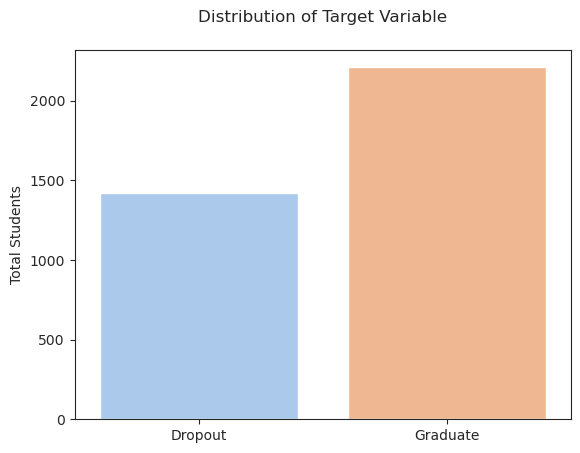

In [16]:
sns.set_style('ticks')
sns.countplot(df, x='Target', palette='pastel')

plt.ylabel('Total Students')
plt.xlabel(None)
plt.title('Distribution of Target Variable', pad=20)

plt.show()

## Distribution by Gender

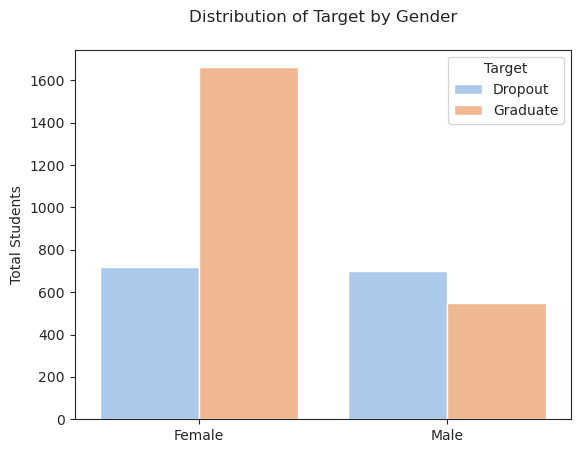

In [17]:
sns.set_style('ticks')
sns.countplot(df, x='Gender', hue='Target', palette='pastel')

plt.xticks(ticks=[0,1], labels=['Female', 'Male'])
plt.ylabel('Total Students')
plt.xlabel(None)
plt.title('Distribution of Target by Gender', pad=20)

plt.show()

According to the data there are many more female graduates than male graduates. There appears to be a much larger sample of female students than male students. From this visualization it is easy to see that males are much more likely to drop out than females.

View crosstab of Gender and Target variable:

In [18]:
ct_gender = pd.crosstab(df['Target'], df['Gender'])
ct_gender = ct_gender.rename(columns={0: 'Female', 1: 'Male'})
ct_gender

Gender,Female,Male
Target,,
Dropout,720,701
Graduate,1661,548


Visualize crosstab.

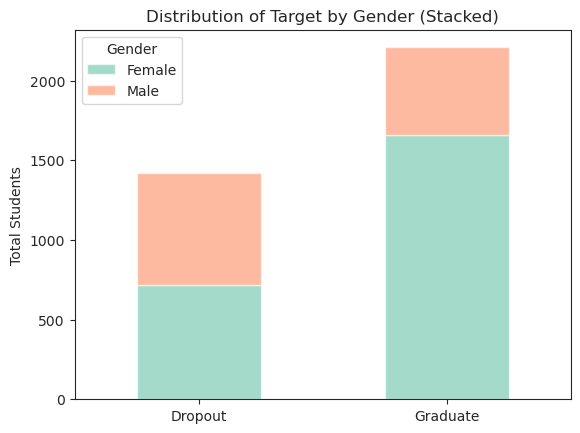

In [19]:
# Create plot
sns.set_style('ticks')
palette = sns.color_palette('Set2')
ct_gender.plot(kind='bar', color=palette, alpha=0.6, stacked=True)

# Customize the labels 
plt.xticks(rotation=0)
plt.ylabel('Total Students')
plt.xlabel(None)
plt.title('Distribution of Target by Gender (Stacked)')

plt.show()

This visualization makes it easy to see that males account for approximately half of all dropouts from the sample population.

## Distribution by Age

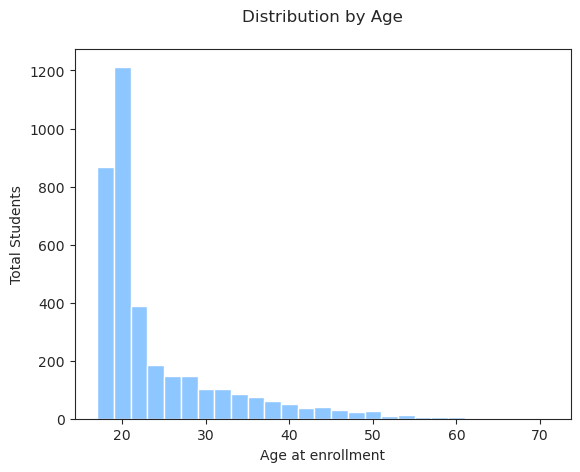

In [20]:
# Create plot
sns.set_style('ticks')
sns.histplot(df, x='Age at enrollment', color='dodgerblue', alpha=0.5, binwidth=2)

# Customize the labels
plt.title('Distribution by Age', pad=20)
plt.ylabel('Total Students')

plt.show()

The majority of students in the sample population are between the ages of 18-21, consistent with what we would expect with undergraduate enrollment.

## Distribution by Marital Status

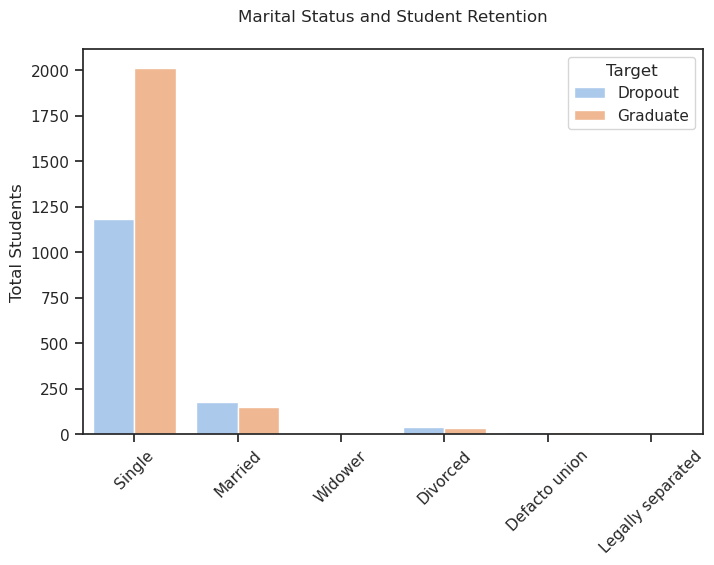

In [21]:
# Create plot
sns.set(rc={'figure.figsize':(8, 5)})
sns.set_style('ticks')
sns.countplot(df, x='Marital status', hue='Target', palette='pastel')

# Change the x tick labels to the corresponding status
plt.xticks(ticks=[0, 1, 2, 3, 4, 5], labels=['Single', 'Married', 'Widower', 
                                            'Divorced', 'Defacto union', 'Legally separated'],
                                            rotation=45)
# Customize the labels
plt.ylabel('Total Students')
plt.xlabel(None)
plt.title('Marital Status and Student Retention', pad=20)

plt.show()

Due to the significant imbalance of marital status leaning toward Single students, marital status is not likely to be a significant influence on overall student success.

## Distribution by Course Program

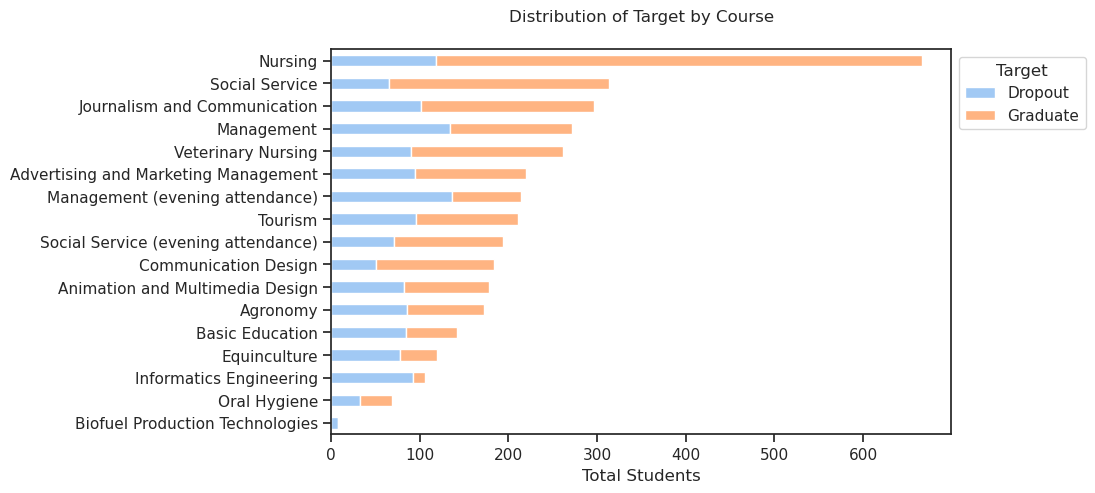

In [22]:
# Group by Course and Target
student_courses = df.groupby(['Course', 'Target']).size().reset_index().pivot(columns='Target', index='Course', values=0)
student_courses = student_courses.rename(index={1: 'Biofuel Production Technologies',
                                                2: 'Animation and Multimedia Design',
                                                3: 'Social Service (evening attendance)',
                                                4: 'Agronomy',
                                                5: 'Communication Design',
                                                6: 'Veterinary Nursing',
                                                7: 'Informatics Engineering',
                                                8: 'Equinculture',
                                                9: 'Management',
                                                10: 'Social Service',
                                                11: 'Tourism',
                                                12: 'Nursing',
                                                13: 'Oral Hygiene',
                                                14: 'Advertising and Marketing Management',
                                                15: 'Journalism and Communication',
                                                16: 'Basic Education',
                                                17: 'Management (evening attendance)'})

# Sum the total number of students for each course and sort for the plot
student_courses['Total'] = student_courses.sum(axis=1)
student_courses_sorted = student_courses.sort_values(by='Total', ascending=True)

# Remove the 'Total' column
student_courses_sorted.drop(columns='Total', inplace=True)

# Generate the plot
sns.set(rc={'figure.figsize':(8, 5)})
sns.set_style('ticks')
sns.set_palette('pastel')
course_plot = student_courses_sorted.plot(kind='barh', stacked=True)

# Customize the labels
plt.title('Distribution of Target by Course', pad=20)
plt.legend(labels=["Dropout", "Graduate"], title='Target', bbox_to_anchor=(1, 1))
plt.xlabel('Total Students')
plt.ylabel(None)

plt.show()

We can see that some courses clearly have a much higher dropout rate than others. Nursing contains the most students, while Biofuel Production Technologies contains the least. Let's check the actual dropout rates for each course next.

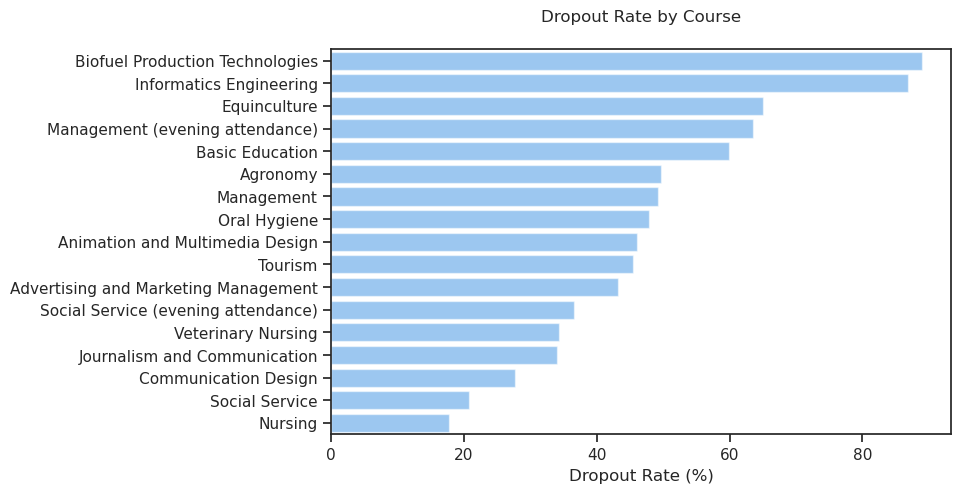

In [23]:
course_names = {1: 'Biofuel Production Technologies',
                                                2: 'Animation and Multimedia Design',
                                                3: 'Social Service (evening attendance)',
                                                4: 'Agronomy',
                                                5: 'Communication Design',
                                                6: 'Veterinary Nursing',
                                                7: 'Informatics Engineering',
                                                8: 'Equinculture',
                                                9: 'Management',
                                                10: 'Social Service',
                                                11: 'Tourism',
                                                12: 'Nursing',
                                                13: 'Oral Hygiene',
                                                14: 'Advertising and Marketing Management',
                                                15: 'Journalism and Communication',
                                                16: 'Basic Education',
                                                17: 'Management (evening attendance)'}
df2 = df.copy()
df2['Course'] = df2['Course'].map(course_names)

# Calculate dropout percentages and sort in descending order
dropout_counts = df2.groupby('Course')['Target'].apply(lambda x: (x == 'Dropout').sum())
total_counts = df2['Course'].value_counts()

dropout_percentages = (dropout_counts / total_counts) * 100
dropout_percentages_sorted = dropout_percentages.sort_values(ascending=False)

# Convert to Data Frame
dropout_rate_df = pd.DataFrame({
    'Course': dropout_percentages_sorted.index,
    'Dropout Rate': dropout_percentages_sorted.values
})

# Visualize in a horizontal bar plot
sns.set_style('ticks')
sns.barplot(dropout_rate_df, x='Dropout Rate', y='Course', 
            color='dodgerblue', alpha=0.5)

# Style the plot
plt.title('Dropout Rate by Course', pad=20)
plt.xlabel('Dropout Rate (%)')
plt.ylabel(None)

plt.show()

Most courses have more graduates than dropouts, but there are some interesting insights that may indicate some courses are more challenging for students to complete than others. 7 out of 17 courses have over 50% dropout rate.

# Feature Selection

## Transform the Target variable

Start by transforming target variable into binary numeric by using get_dummies().

In [24]:
df = pd.get_dummies(df, columns=['Target'])
df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nationality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target_Dropout,Target_Graduate
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0.000000,0,10.8,1.4,1.74,1,0
1,1,6,1,11,1,1,1,1,3,4,...,6,6,6,13.666667,0,13.9,-0.3,0.79,0,1
2,1,1,5,5,1,1,1,22,27,10,...,6,0,0,0.000000,0,10.8,1.4,1.74,1,0
3,1,8,2,15,1,1,1,23,27,6,...,6,10,5,12.400000,0,9.4,-0.8,-3.12,0,1
4,2,12,1,3,0,1,1,22,28,10,...,6,6,6,13.000000,0,13.9,-0.3,0.79,0,1


Drop the excess dummy variables to retain "Target_Dropout" only and rename back to "Target".

In [25]:
dummies_to_drop = ['Target_Graduate']
df.drop(columns=dummies_to_drop, inplace=True)
df.rename(columns={'Target_Dropout': 'Target'}, inplace=True)

df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nationality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,1
1,1,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,0
2,1,1,5,5,1,1,1,22,27,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,1
3,1,8,2,15,1,1,1,23,27,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,0
4,2,12,1,3,0,1,1,22,28,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,0


## Collinearity

In [26]:
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

In [27]:
df.corr().round(2)

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nationality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
Marital status,1.00,0.24,-0.13,0.00,-0.27,0.13,-0.02,0.18,0.12,0.07,0.03,-0.24,-0.03,0.04,-0.10,-0.00,-0.07,0.52,-0.03,0.07,0.06,0.06,-0.04,-0.07,0.04,0.07,0.04,0.03,-0.06,-0.08,0.03,-0.02,0.01,-0.03,0.10
Application mode,0.24,1.00,-0.25,-0.08,-0.28,0.43,-0.01,0.10,0.09,0.01,-0.01,-0.27,-0.02,0.11,-0.14,0.17,-0.16,0.47,-0.00,0.24,0.16,0.21,-0.03,-0.12,0.05,0.24,0.13,0.16,-0.08,-0.12,0.05,0.08,-0.03,-0.01,0.23
Application order,-0.13,-0.25,1.00,0.12,0.17,-0.20,-0.03,-0.06,-0.05,-0.04,-0.03,0.35,0.03,-0.07,0.06,-0.11,0.07,-0.28,-0.03,-0.13,-0.02,-0.09,0.04,0.06,-0.04,-0.13,0.03,-0.04,0.07,0.06,-0.03,-0.10,-0.00,0.03,-0.09
Course,0.00,-0.08,0.12,1.00,-0.03,-0.16,0.00,0.04,0.03,0.02,0.00,0.01,-0.01,-0.04,0.03,-0.09,0.05,-0.06,0.01,-0.14,0.11,0.02,0.07,0.17,-0.06,-0.12,0.18,0.06,0.10,0.17,-0.02,-0.05,0.04,0.01,-0.01
Daytime/evening attendance,-0.27,-0.28,0.17,-0.03,1.00,-0.12,0.03,-0.18,-0.13,-0.04,-0.00,0.24,0.03,0.00,0.05,-0.03,0.11,-0.45,0.03,-0.12,-0.04,-0.05,0.03,0.07,0.04,-0.11,0.01,0.01,0.05,0.06,-0.01,0.07,-0.02,0.01,-0.08
Previous qualification,0.13,0.43,-0.20,-0.16,-0.12,1.00,-0.04,0.01,0.02,0.00,0.01,-0.17,-0.01,0.12,-0.10,0.11,-0.09,0.27,-0.03,0.16,0.08,0.13,-0.02,-0.05,0.04,0.14,0.05,0.08,-0.05,-0.05,0.05,0.09,-0.06,0.06,0.10
Nationality,-0.02,-0.01,-0.03,0.00,0.03,-0.04,1.00,-0.03,-0.08,0.02,0.02,-0.00,0.00,0.07,-0.05,-0.03,-0.01,-0.01,0.92,0.01,-0.01,-0.00,0.00,-0.00,0.01,0.00,-0.03,-0.03,-0.02,-0.01,-0.01,-0.00,-0.01,0.03,0.00
Mother's qualification,0.18,0.10,-0.06,0.04,-0.18,0.01,-0.03,1.00,0.53,0.31,0.13,-0.07,-0.01,0.01,-0.03,-0.05,0.03,0.28,-0.02,0.04,0.05,0.05,-0.02,-0.04,0.01,0.04,0.03,0.03,-0.02,-0.03,0.03,-0.11,0.06,-0.07,0.05
Father's qualification,0.12,0.09,-0.05,0.03,-0.13,0.02,-0.08,0.53,1.00,0.22,0.19,-0.07,0.00,-0.01,-0.02,-0.06,0.09,0.19,-0.07,0.04,0.04,0.04,0.01,-0.01,-0.01,0.05,0.03,0.01,0.00,-0.01,0.00,-0.07,0.06,-0.06,0.00
Mother's occupation,0.07,0.01,-0.04,0.02,-0.04,0.00,0.02,0.31,0.22,1.00,0.69,-0.04,0.00,0.09,-0.02,-0.03,0.12,0.08,0.01,-0.00,0.01,-0.01,0.02,0.01,-0.01,-0.00,0.00,-0.01,0.03,0.04,-0.00,0.01,0.03,0.07,-0.06


I see some significant collinearity between some of the academic path variables as well as Nationality/International. I will visualize in a heatmap to see more clearly and decide which variables to omit from the analysis. 

First group the features into demographics and amademic path.

In [28]:
# Demographic
demographics = df[["Marital status", "Nationality", "Displaced", "Gender", 
                   "Age at enrollment", "International", "Target"]]
# Academic
academic_path = df[['Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd sem (grade)',
       'Curricular units 2nd sem (without evaluations)',
       'Target']]

## Demographic Heatmap

Text(0.5, 1.0, 'Demographics Collinearity Heatmap')

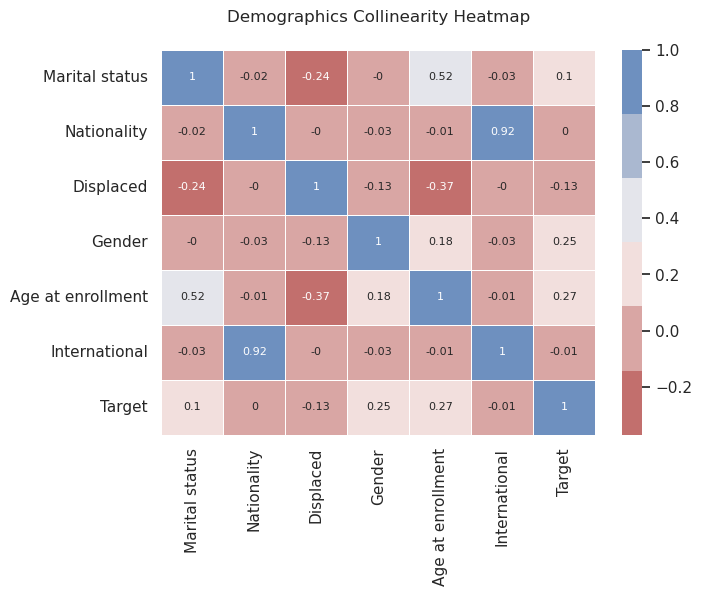

In [29]:
sns.set(rc={"figure.figsize": (7, 5)})
sns.heatmap(demographics.corr().round(2), linewidths=0.5,
            annot=True, annot_kws={"size": 8},
            cmap=sns.color_palette("vlag_r"))

plt.title('Demographics Collinearity Heatmap', pad=20)

Explore Nationality a little further to see what the sample population looks like.

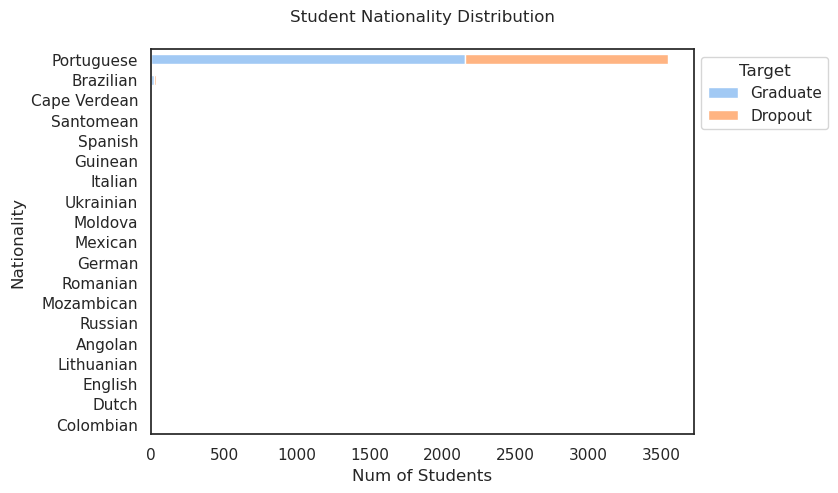

In [30]:
# Group by Nationality and Target
student_nationality = df.groupby(['Nationality', 'Target']).size().reset_index().pivot(columns='Target', index='Nationality', values=0)
student_nationality = student_nationality.rename(index={1:'Portuguese', 2:'German', 3:'Spanish', 4:'Italian', 5:'Dutch', 
               6:'English', 7:'Lithuanian', 8:'Angolan', 9:'Cape Verdean', 
               10:'Guinean', 11:'Mozambican', 12:'Santomean', 13:'Turkish', 
               14:'Brazilian', 15:'Romanian', 16:'Moldova', 17:'Mexican', 
               18:'Ukrainian', 19:'Russian', 20:'Cuban', 21:'Colombian'})

# Sum the total number of students for each nationality and sort for the plot
student_nationality['Total'] = student_nationality.sum(axis=1)
student_nationality_sorted = student_nationality.sort_values(by='Total', ascending=True)

# Remove the 'Total' column
student_nationality_sorted.drop(columns='Total', inplace=True)

# Generate the plot
sns.set_palette('pastel')
sns.set_style("white")
nationality_plot = student_nationality_sorted.plot(kind='barh', stacked=True)

# Customize the labels
plt.title('Student Nationality Distribution', pad=20)
plt.legend(labels=["Graduate", "Dropout"], title='Target', bbox_to_anchor=(1, 1))
plt.xlabel('Num of Students')
plt.show()

The vast majority of students are of Portuguese descent. How many students do NOT have Portuguese Nationality?

In [31]:
filtered_student_nationality = student_nationality_sorted[
    (student_nationality_sorted > 0).all(axis=1) &
    (student_nationality_sorted.index != 'Portuguese')
].sort_values(by=0, ascending=False)
filtered_student_nationality

Target,0,1
Nationality,,
Brazilian,18.0,14.0
Santomean,8.0,1.0
Cape Verdean,8.0,4.0
Guinean,4.0,1.0
Spanish,4.0,4.0
Ukrainian,2.0,1.0
Mexican,1.0,1.0


The vast majority of students in this sample population are of Portugese descent, and has 0 correlation with the target variable down to three decimals, which means that this feature will not be a good predictor of student success and can be dropped from the analysis.

Based on the above Nationality data we know the vast majority of the sample population are domestic students, with very few International students.

Display the International distribution plot to validate.

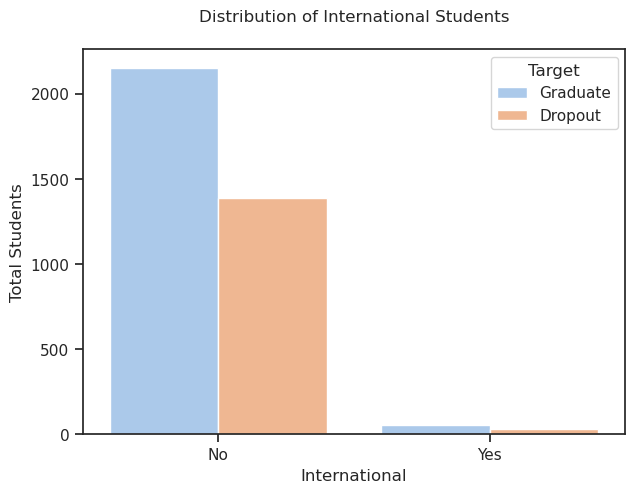

In [32]:
# Create the plot
sns.set_style('ticks')
sns.countplot(df, x='International', hue='Target', palette='pastel')

# Customize the labels
plt.title('Distribution of International Students', pad=20)
plt.ylabel('Total Students')
plt.xticks(ticks=[0,1], labels=['No','Yes'])
plt.legend(labels=["Graduate", "Dropout"], title='Target', bbox_to_anchor=(1, 1))

plt.show()

As expected, nearly all students are domestically located, and the International feature has nearly zero correlation with the target variable. Due to this imbalance, the International feature is not a good predictor of student success in this sample population and will be dropped from the analysis.

In [33]:
features_to_drop = ['Nationality', 'International']
features_to_drop

['Nationality', 'International']

## Academic Heatmap

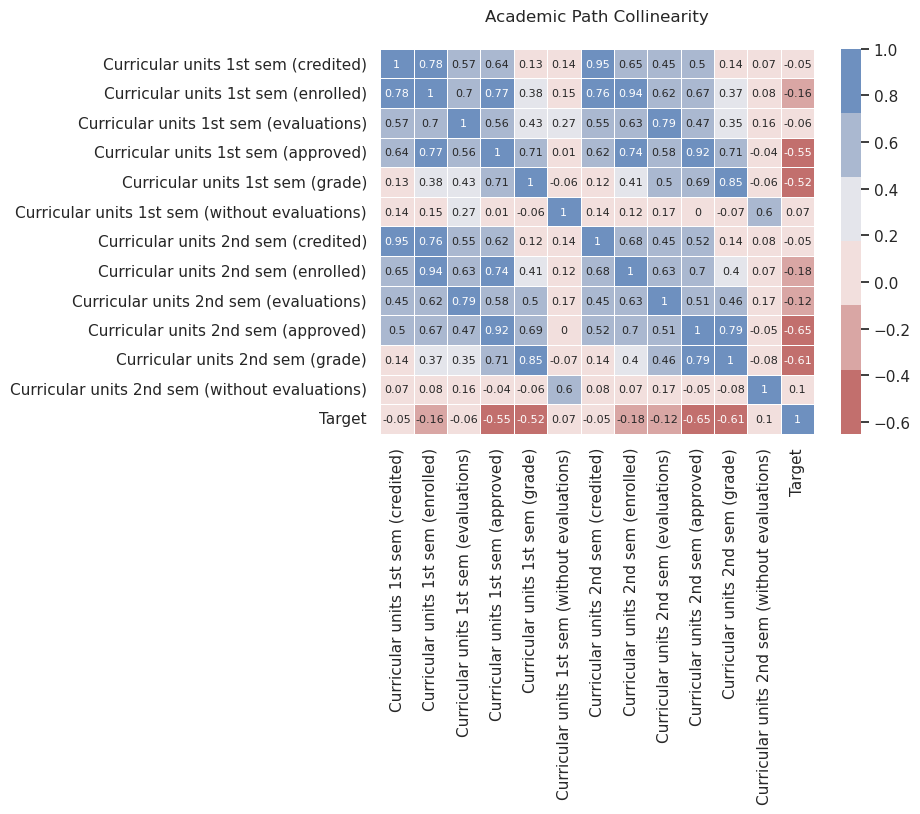

In [34]:
# Create the plot
sns.set(rc={"figure.figsize": (7, 5)})
sns.heatmap(academic_path.corr().round(2), linewidths=0.5,
            annot=True, annot_kws={"size": 8},
            cmap=sns.color_palette("vlag_r"))
# Customize the labels
plt.title('Academic Path Collinearity', pad=20)

plt.show()

Some of these academic variables are highly correlated with each other, and some have little to no correlation with the target variable. Based on the above correlation matrix I will drop features with less than 10% correlation with the Target and 1st semester features that are highly correlated with 2nd semester features.

In [35]:
features_to_drop.extend(['Curricular units 1st sem (credited)', 
                           'Curricular units 1st sem (enrolled)',
                           'Curricular units 1st sem (evaluations)', 
                           'Curricular units 1st sem (approved)',
                           'Curricular units 1st sem (grade)', 
                           'Curricular units 1st sem (without evaluations)',
                           'Curricular units 2nd sem (credited)',
                           'Curricular units 2nd sem (without evaluations)']
)
features_to_drop

['Nationality',
 'International',
 'Curricular units 1st sem (credited)',
 'Curricular units 1st sem (enrolled)',
 'Curricular units 1st sem (evaluations)',
 'Curricular units 1st sem (approved)',
 'Curricular units 1st sem (grade)',
 'Curricular units 1st sem (without evaluations)',
 'Curricular units 2nd sem (credited)',
 'Curricular units 2nd sem (without evaluations)']

## Drop Features

In [36]:
df.drop(features_to_drop, axis=1, inplace=True)
df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,13,10,6,10,1,0,0,1,1,0,20,0,0,0,0.000000,10.8,1.4,1.74,1
1,1,6,1,11,1,1,1,3,4,4,1,0,0,0,1,0,19,6,6,6,13.666667,13.9,-0.3,0.79,0
2,1,1,5,5,1,1,22,27,10,10,1,0,0,0,1,0,19,6,0,0,0.000000,10.8,1.4,1.74,1
3,1,8,2,15,1,1,23,27,6,4,1,0,0,1,0,0,20,6,10,5,12.400000,9.4,-0.8,-3.12,0
4,2,12,1,3,0,1,22,28,10,10,0,0,0,1,0,0,45,6,6,6,13.000000,13.9,-0.3,0.79,0


Check each remaining variable's correlation with the target variable.

In [37]:
df.corr()['Target']

Marital status                            0.100479
Application mode                          0.233888
Application order                        -0.094355
Course                                   -0.006814
Daytime/evening attendance               -0.084496
Previous qualification                    0.102795
Mother's qualification                    0.048459
Father's qualification                    0.003850
Mother's occupation                      -0.064195
Father's occupation                      -0.073238
Displaced                                -0.126113
Educational special needs                 0.007254
Debtor                                    0.267207
Tuition fees up to date                  -0.442138
Gender                                    0.251955
Scholarship holder                       -0.313018
Age at enrollment                         0.267229
Curricular units 2nd sem (enrolled)      -0.182897
Curricular units 2nd sem (evaluations)   -0.119239
Curricular units 2nd sem (appro

Since computational time is not an issue, and collinearity is at a minimum, I will leave the remaining features in the analysis.

# Logistic Regression

## Scale the Data

Access the solution algorithm and instantiate as mm_scaler.

In [38]:
from sklearn.preprocessing import MinMaxScaler
mm_scaler = MinMaxScaler()

Fit the scaler to the predictor variables.

In [39]:
X_scaled = mm_scaler.fit_transform(df)

View the scaled data frame.

In [40]:
df[df.columns] = X_scaled
df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Unemployment rate,Inflation rate,GDP,Target
0,0.0,0.411765,0.833333,0.0625,1.0,0.0,0.428571,0.272727,0.161290,0.200000,1.0,0.0,0.0,1.0,1.0,0.0,0.056604,0.00000,0.000000,0.00,0.000000,0.372093,0.488889,0.766182,1.0
1,0.0,0.294118,0.166667,0.6250,1.0,0.0,0.000000,0.060606,0.096774,0.066667,1.0,0.0,0.0,0.0,1.0,0.0,0.037736,0.26087,0.181818,0.30,0.735897,0.732558,0.111111,0.640687,0.0
2,0.0,0.000000,0.833333,0.2500,1.0,0.0,0.750000,0.787879,0.290323,0.200000,1.0,0.0,0.0,0.0,1.0,0.0,0.037736,0.26087,0.000000,0.00,0.000000,0.372093,0.488889,0.766182,1.0
3,0.0,0.411765,0.333333,0.8750,1.0,0.0,0.785714,0.787879,0.161290,0.066667,1.0,0.0,0.0,1.0,0.0,0.0,0.056604,0.26087,0.303030,0.25,0.667692,0.209302,0.000000,0.124174,0.0
4,0.2,0.647059,0.166667,0.1250,0.0,0.0,0.750000,0.818182,0.290323,0.200000,0.0,0.0,0.0,1.0,0.0,0.0,0.528302,0.26087,0.181818,0.30,0.700000,0.732558,0.111111,0.640687,0.0


## Create Feature and Target Data Structures

In [41]:
X = df.drop('Target', axis=1)
y = df['Target']

Check the shape of the X data structure.

In [42]:
X.shape

(3630, 24)

Verify structure types.

In [43]:
print("X: ", type(X))
print("y: ", type(y))

X:  <class 'pandas.core.frame.DataFrame'>
y:  <class 'pandas.core.series.Series'>


## Fit Model With One Hold-Out Sample

Split the data into train and testing data using sklearn. Save 30% of the data for testing, and stratify the target variable to keep equal proportions in each group.

In [44]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30,
                                                    stratify=df['Target'],
                                                    random_state=1)

Check that the stratify parameter worked by maintaining the same balance in the train/test data sets as the original data frame:

In [45]:
y_train.value_counts()

0.0    1546
1.0     995
Name: Target, dtype: int64

In [46]:
y_test.value_counts()

0.0    663
1.0    426
Name: Target, dtype: int64

In [47]:
print("size of X data structures: ", X_train.shape, X_test.shape)
print("size of y data structures: ", y_train.shape, y_test.shape)

size of X data structures:  (2541, 24) (1089, 24)
size of y data structures:  (2541,) (1089,)


Check the proportion of target variable in the training and testing data.

In [48]:
print("Proportion of Target in the training data: ", round(995/(995+1546), 3))
print("Proportion of Target in the testing data: ", round(426/(426+663), 3))

Proportion of Target in the training data:  0.392
Proportion of Target in the testing data:  0.391


The data were split as expected.

## Access Solution Algorithm & Fit Model

In [49]:
from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression(solver='lbfgs', max_iter=500)

Fit the model to the training data.

In [50]:
logistic_model.fit(X_train, y_train)

LogisticRegression(max_iter=500)

Show the intercept and coefficients to examine strengths of each feature variable.

In [51]:
print("intercept %.3f" % logistic_model.intercept_, "\n")
cf = pd.DataFrame()
cf['Feature'] = X.columns
cf['Coef'] = np.transpose(logistic_model.coef_).round(3)
cf.sort_values(by='Coef', ascending=False)

intercept 1.789 



,Feature,Coef
17,Curricular units 2nd sem (enrolled),4.464
18,Curricular units 2nd sem (evaluations),3.700
16,Age at enrollment,1.755
3,Course,1.271
12,Debtor,1.127
1,Application mode,1.064
14,Gender,0.467
4,Daytime/evening attendance,0.420
6,Mother's qualification,0.366
10,Displaced,0.151


## Evaluate Fit

In [52]:
y_fit = logistic_model.predict(X_train)
y_pred = logistic_model.predict(X_test)

Check the probilities of the positive outcomes (Dropout) and combine with the predicted values to quickly assess the model's predictions.

In [53]:
probs = [i[1] for i in logistic_model.predict_proba(X_test)]
pred_df = pd.DataFrame({'true_values': y_test,
'pred_values': y_pred,
'pred_probs':probs})
pred_df.head(15).transpose().style.format("{:.3}")

,1001,514,1191,383,141,1343,2093,2642,598,323,2548,3168,4045,657,879
true_values,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0
pred_values,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
pred_probs,0.988,0.995,0.118,0.0414,0.142,0.0903,0.0713,0.983,0.163,0.241,0.0491,0.633,0.902,0.0596,0.286


Check accuracy for training and testing data.

In [54]:
from sklearn.metrics import accuracy_score
print('Accuracy for training data: %.3f' % accuracy_score(y_train, y_fit))
print('Accuracy for testing data: %.3f' % accuracy_score(y_test, y_pred))

Accuracy for training data: 0.901
Accuracy for testing data: 0.907


The accuracy is highly similar for both the training and testing data, indicating no overfitting.

### Confusion Matrix

In [55]:
from sklearn.metrics import confusion_matrix
c_matrix = pd.DataFrame(confusion_matrix(y_test, y_pred))
c_matrix

,0,1
0,630,33
1,68,358


Visualize confusion matrix.

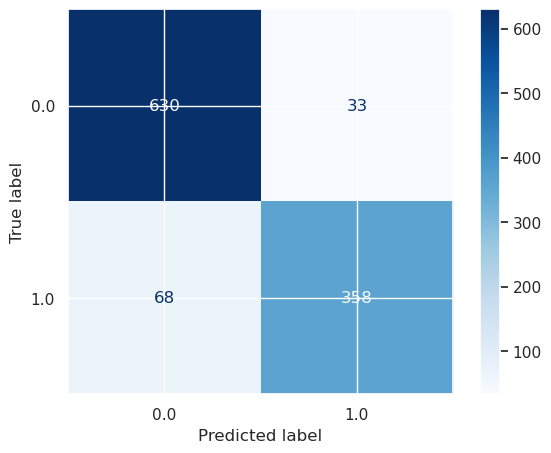

In [56]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap='Blues')

In [57]:
print("True Negatives: ", c_matrix.iloc[0,0])
print("True Positives: ", c_matrix.iloc[1,1])
print("False Negatives: ", c_matrix.iloc[1,0])
print("False Positives: ", c_matrix.iloc[0,1])

True Negatives:  630
True Positives:  358
False Negatives:  68
False Positives:  33


### Fit Metrics

Calculate accuracy, recall, precision, & F1.

In [58]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
print('Accuracy for testing data: %3f' % accuracy_score(y_test, y_pred))
print ('Recall for testing data: %.3f' % recall_score(y_test, y_pred))
print ('Precision for testing data: %.3f' % precision_score(y_test, y_pred))
print ('F1 for testing data: %.3f' % f1_score(y_test, y_pred))

Accuracy for testing data: 0.907254
Recall for testing data: 0.840
Precision for testing data: 0.916
F1 for testing data: 0.876


Based on the lowest fit index (recall) 84%, the model correctly forecasts almost 84% of Dropouts as Dropout (true positives). So the model mislabels almost 16% of actual Dropouts as Graduates.  

Precision is even higher, which means that of those the model forecasted as Dropout, 91.6% are actual dropouts.
8% of those predicted as Dropout are indicated as Graduate in the data, a false positive.  

By definition, the F1 statistic is between recall and precision, their harmonic average, at 87.6%.

## Baseline Probabilities

View the baseline probabilities to help evaluate the effectiveness of the model.

In [59]:
my = y.mean()
max_my = np.max([y.mean(), 1-y.mean()])
print("proportion of 0\'s (Graduate): %.3f" % (1-my))
print("Proportion of 1\'s (Dropout): %.3f" % my)
print("Null model accuracy: %.3f" % max_my)

proportion of 0's (Graduate): 0.609
Proportion of 1's (Dropout): 0.391
Null model accuracy: 0.609


The Logistic regression model with a single hold-out sample is significantly more accurate than the null model.

## Logistic Model Validation

Next I will evaluate the effectiveness of the model with multiple hold-out samples using K-fold cross-validation.

access solution algorithm and instantiate as skf

In [60]:
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)

The cross_validate() function enables us to obtain multiple evaluation scores from the same cross-validation folds without having to repeat the computations for each score. I will include the training scores to compare with the corresponding testing scores to more easily identify overfitting.

In [61]:
from sklearn.model_selection import cross_validate
scores = cross_validate(logistic_model, X, y, cv=skf,
                        scoring=('accuracy', 'recall', 'precision', 'f1'),
                        return_train_score=True)

logistic_scores = pd.DataFrame(scores).round(3)
logistic_scores

,fit_time,score_time,test_accuracy,train_accuracy,test_recall,train_recall,test_precision,train_precision,test_f1,train_f1
0,0.018,0.010,0.901,0.906,0.807,0.827,0.931,0.925,0.865,0.874
1,0.017,0.009,0.904,0.905,0.849,0.823,0.899,0.925,0.873,0.871
2,0.021,0.010,0.906,0.904,0.831,0.821,0.922,0.927,0.874,0.870
3,0.023,0.009,0.893,0.905,0.806,0.826,0.909,0.923,0.854,0.872
4,0.019,0.009,0.894,0.901,0.799,0.824,0.919,0.914,0.855,0.867


Display the mean values for the cross-validation fit metrics.

In [62]:
print('Mean of test accuracy: %.3f' % logistic_scores['test_accuracy'].mean())
print('Mean of test recall: %.3f' % logistic_scores['test_recall'].mean())
print('Mean of test precision: %.3f' % logistic_scores['test_precision'].mean())
print('Mean of test F1: %.3f' % logistic_scores['test_f1'].mean())

Mean of test accuracy: 0.900
Mean of test recall: 0.818
Mean of test precision: 0.916
Mean of test F1: 0.864


The result of the cross-validation with multiple hold-out samples is a slight decrease accuracy and recall, but overall no significant change in the conclusion of a good-fitting model.

<u>Original fit scores:</u>  
Accuracy for testing data: 0.907  
Recall for testing data: 0.840  
Precision for testing data: 0.916  
F1 for testing data: 0.876

# Decision Tree

Next, I will test how effective a decision tree model is at predicting the target variable compared to logistic regression. From this information I will be able to determine the best model for predicting student success.

Reestablish X and y data structures and class labels for the final tree.

In [63]:
classes = ['Graduate', 'Dropout']
X = df.drop(['Target'], axis=1)
y = df['Target']

In [64]:
X.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Unemployment rate,Inflation rate,GDP
0,0.0,0.411765,0.833333,0.0625,1.0,0.0,0.428571,0.272727,0.161290,0.200000,1.0,0.0,0.0,1.0,1.0,0.0,0.056604,0.00000,0.000000,0.00,0.000000,0.372093,0.488889,0.766182
1,0.0,0.294118,0.166667,0.6250,1.0,0.0,0.000000,0.060606,0.096774,0.066667,1.0,0.0,0.0,0.0,1.0,0.0,0.037736,0.26087,0.181818,0.30,0.735897,0.732558,0.111111,0.640687
2,0.0,0.000000,0.833333,0.2500,1.0,0.0,0.750000,0.787879,0.290323,0.200000,1.0,0.0,0.0,0.0,1.0,0.0,0.037736,0.26087,0.000000,0.00,0.000000,0.372093,0.488889,0.766182
3,0.0,0.411765,0.333333,0.8750,1.0,0.0,0.785714,0.787879,0.161290,0.066667,1.0,0.0,0.0,1.0,0.0,0.0,0.056604,0.26087,0.303030,0.25,0.667692,0.209302,0.000000,0.124174
4,0.2,0.647059,0.166667,0.1250,0.0,0.0,0.750000,0.818182,0.290323,0.200000,0.0,0.0,0.0,1.0,0.0,0.0,0.528302,0.26087,0.181818,0.30,0.700000,0.732558,0.111111,0.640687


## Access Solution Algorithm

Access the DecicisionTreeClassifier and instantiate with a max_depth of 5.

In [65]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(max_depth=5)
dt_model

DecisionTreeClassifier(max_depth=5)

## Grid Search: Hyperparameter Tuning with Cross-Validation

Instantiate Kfold module with 3 data splits.

In [66]:
from sklearn.model_selection import KFold
kf3 = KFold(n_splits=3, shuffle=True, random_state=1)

Import GridSearchCV and set the parameters. Again, return the train scores for comparison.

In [67]:
from sklearn.model_selection import GridSearchCV
kparams = {'max_depth': [2, 3, 4, 5],
           'max_features': [2, 3, 4, 5, 6, 7, 8]}
grid_search = GridSearchCV(dt_model, param_grid=kparams, cv=kf3,
                           scoring=('accuracy', 'recall', 'precision', 'f1'),
                           refit=False, return_train_score=True)
grid_search.fit(X,y)

GridSearchCV(cv=KFold(n_splits=3, random_state=1, shuffle=True),
             estimator=DecisionTreeClassifier(max_depth=5),
             param_grid={'max_depth': [2, 3, 4, 5],
                         'max_features': [2, 3, 4, 5, 6, 7, 8]},
             refit=False, return_train_score=True,
             scoring=('accuracy', 'recall', 'precision', 'f1'))

Save the results to a Data Frame.

In [68]:
dt_results = pd.DataFrame(grid_search.cv_results_).round(3)
dt_results = dt_results.drop(['params'], axis='columns')

Display relevant results.

In [69]:
# Select relevant columns
dt_summary = dt_results[['param_max_depth', 'param_max_features',
'mean_test_accuracy', 'mean_test_recall', 'mean_test_precision', 'mean_test_f1',
'mean_train_accuracy','mean_train_recall', 'mean_train_precision', 'mean_train_f1']]

# Shorten column names for readability
dt_summary = dt_summary.rename(columns= {
'param_max_depth': 'depth',
'param_max_features': 'features',
'mean_test_accuracy': 'test_accuracy',
'mean_test_recall': 'test_recall',
'mean_test_precision': 'test_precision',
'mean_test_f1': 'test_f1',
'mean_train_accuracy': 'train_accuracy',
'mean_train_recall': 'train_recall',
'mean_train_precision': 'train_precision',
'mean_train_f1': 'train_f1'})

# Add columns to quickly assess varance in train vs. test metrics
dt_summary['accuracy_variance'] = abs(dt_summary['train_accuracy'] - dt_summary['test_accuracy'])
dt_summary['recall_variance'] = abs(dt_summary['train_recall'] - dt_summary['test_recall'])
dt_summary['precision_variance'] = abs(dt_summary['train_precision'] - dt_summary['test_precision'])
dt_summary['f1_variance'] = abs(dt_summary['train_f1'] - dt_summary['test_f1'])
dt_summary

,depth,features,test_accuracy,test_recall,test_precision,test_f1,train_accuracy,train_recall,train_precision,train_f1,accuracy_variance,recall_variance,precision_variance,f1_variance
0,2,2,0.694,0.353,0.634,0.416,0.696,0.344,0.691,0.412,0.002,0.009,0.057,0.004
1,2,3,0.777,0.514,0.847,0.618,0.774,0.508,0.852,0.617,0.003,0.006,0.005,0.001
2,2,4,0.761,0.519,0.823,0.616,0.762,0.515,0.829,0.614,0.001,0.004,0.006,0.002
3,2,5,0.835,0.668,0.884,0.760,0.840,0.673,0.891,0.766,0.005,0.005,0.007,0.006
4,2,6,0.875,0.783,0.886,0.831,0.873,0.778,0.884,0.827,0.002,0.005,0.002,0.004
5,2,7,0.839,0.655,0.911,0.750,0.847,0.680,0.909,0.768,0.008,0.025,0.002,0.018
6,2,8,0.771,0.609,0.789,0.677,0.776,0.618,0.783,0.686,0.005,0.009,0.006,0.009
7,3,2,0.737,0.571,0.703,0.629,0.741,0.576,0.711,0.636,0.004,0.005,0.008,0.007
8,3,3,0.766,0.576,0.775,0.639,0.769,0.571,0.780,0.638,0.003,0.005,0.005,0.001
9,3,4,0.793,0.718,0.752,0.732,0.800,0.718,0.763,0.738,0.007,0.000,0.011,0.006


Based on the grid search above, a decision tree model with a depth of 4 and 6 features seems to fit the data reasonably well, with the highest recall and minimal variance between the train/test data. I will use this model to test on the data.  

Selected Model Test Accuracy: 0.888  
Selected Model Test Recall: 0.797  
Selected Model Test Precision: 0.906  
Selected Model Test F1: 0.848  

Run the selected model and save results of the fit() for use in the Tree later.

In [70]:
dt_model = DecisionTreeClassifier(max_depth=4, max_features=8)
dt_fit = dt_model.fit(X,y)

## Feature Importance

In [71]:
dfImp = pd.DataFrame(dt_model.feature_importances_)
dfImp = dfImp.set_index(X.columns, drop=False)
dfImp.columns = ['Importance']
dfImp.round(3)

,Importance
Marital status,0.000
Application mode,0.017
Application order,0.000
Course,0.009
Daytime/evening attendance,0.000
Previous qualification,0.000
Mother's qualification,0.000
Father's qualification,0.000
Mother's occupation,0.000
Father's occupation,0.000


Curricular units 2nd sem (approved) clearly holds the most weight in the model at 67.9%, followed by Age at enrollment at 17.7%. The remaining features make up less than 15% of total importance.

To see how the model performed on the sample population, calculate predicted values on the original data.

In [72]:
y_fit = dt_model.predict(X)
y_fit[0:19]

array([1., 0., 1., 0., 0., 1., 0., 1., 0., 1., 0., 0., 1., 0., 0., 1., 0.,
       0., 1.])

## Confusion Matrix

In [73]:
pd.DataFrame(confusion_matrix(y, y_fit))

,0,1
0,2035,174
1,246,1175


From the confusion matrix, calculate the fit indices for the selected model.

In [74]:
print ('Accuracy: %.3f' % accuracy_score(y, y_fit))
print ('Recall: %.3f' % recall_score(y, y_fit))
print ('Precision: %.3f' % precision_score(y, y_fit))
print ('F1: %.3f' % f1_score(y, y_fit))

Accuracy: 0.884
Recall: 0.827
Precision: 0.871
F1: 0.848


The model performed a bit better when the training data was included, indicating some minor overfitting.  

Original Test Accuracy: 0.875  
Original Test Recall: 0.759  
Original Test Precision: 0.905  
Original Test F1: 0.825  

## Visualize Decision Tree

Access the tree module from sklearn and generate plot.

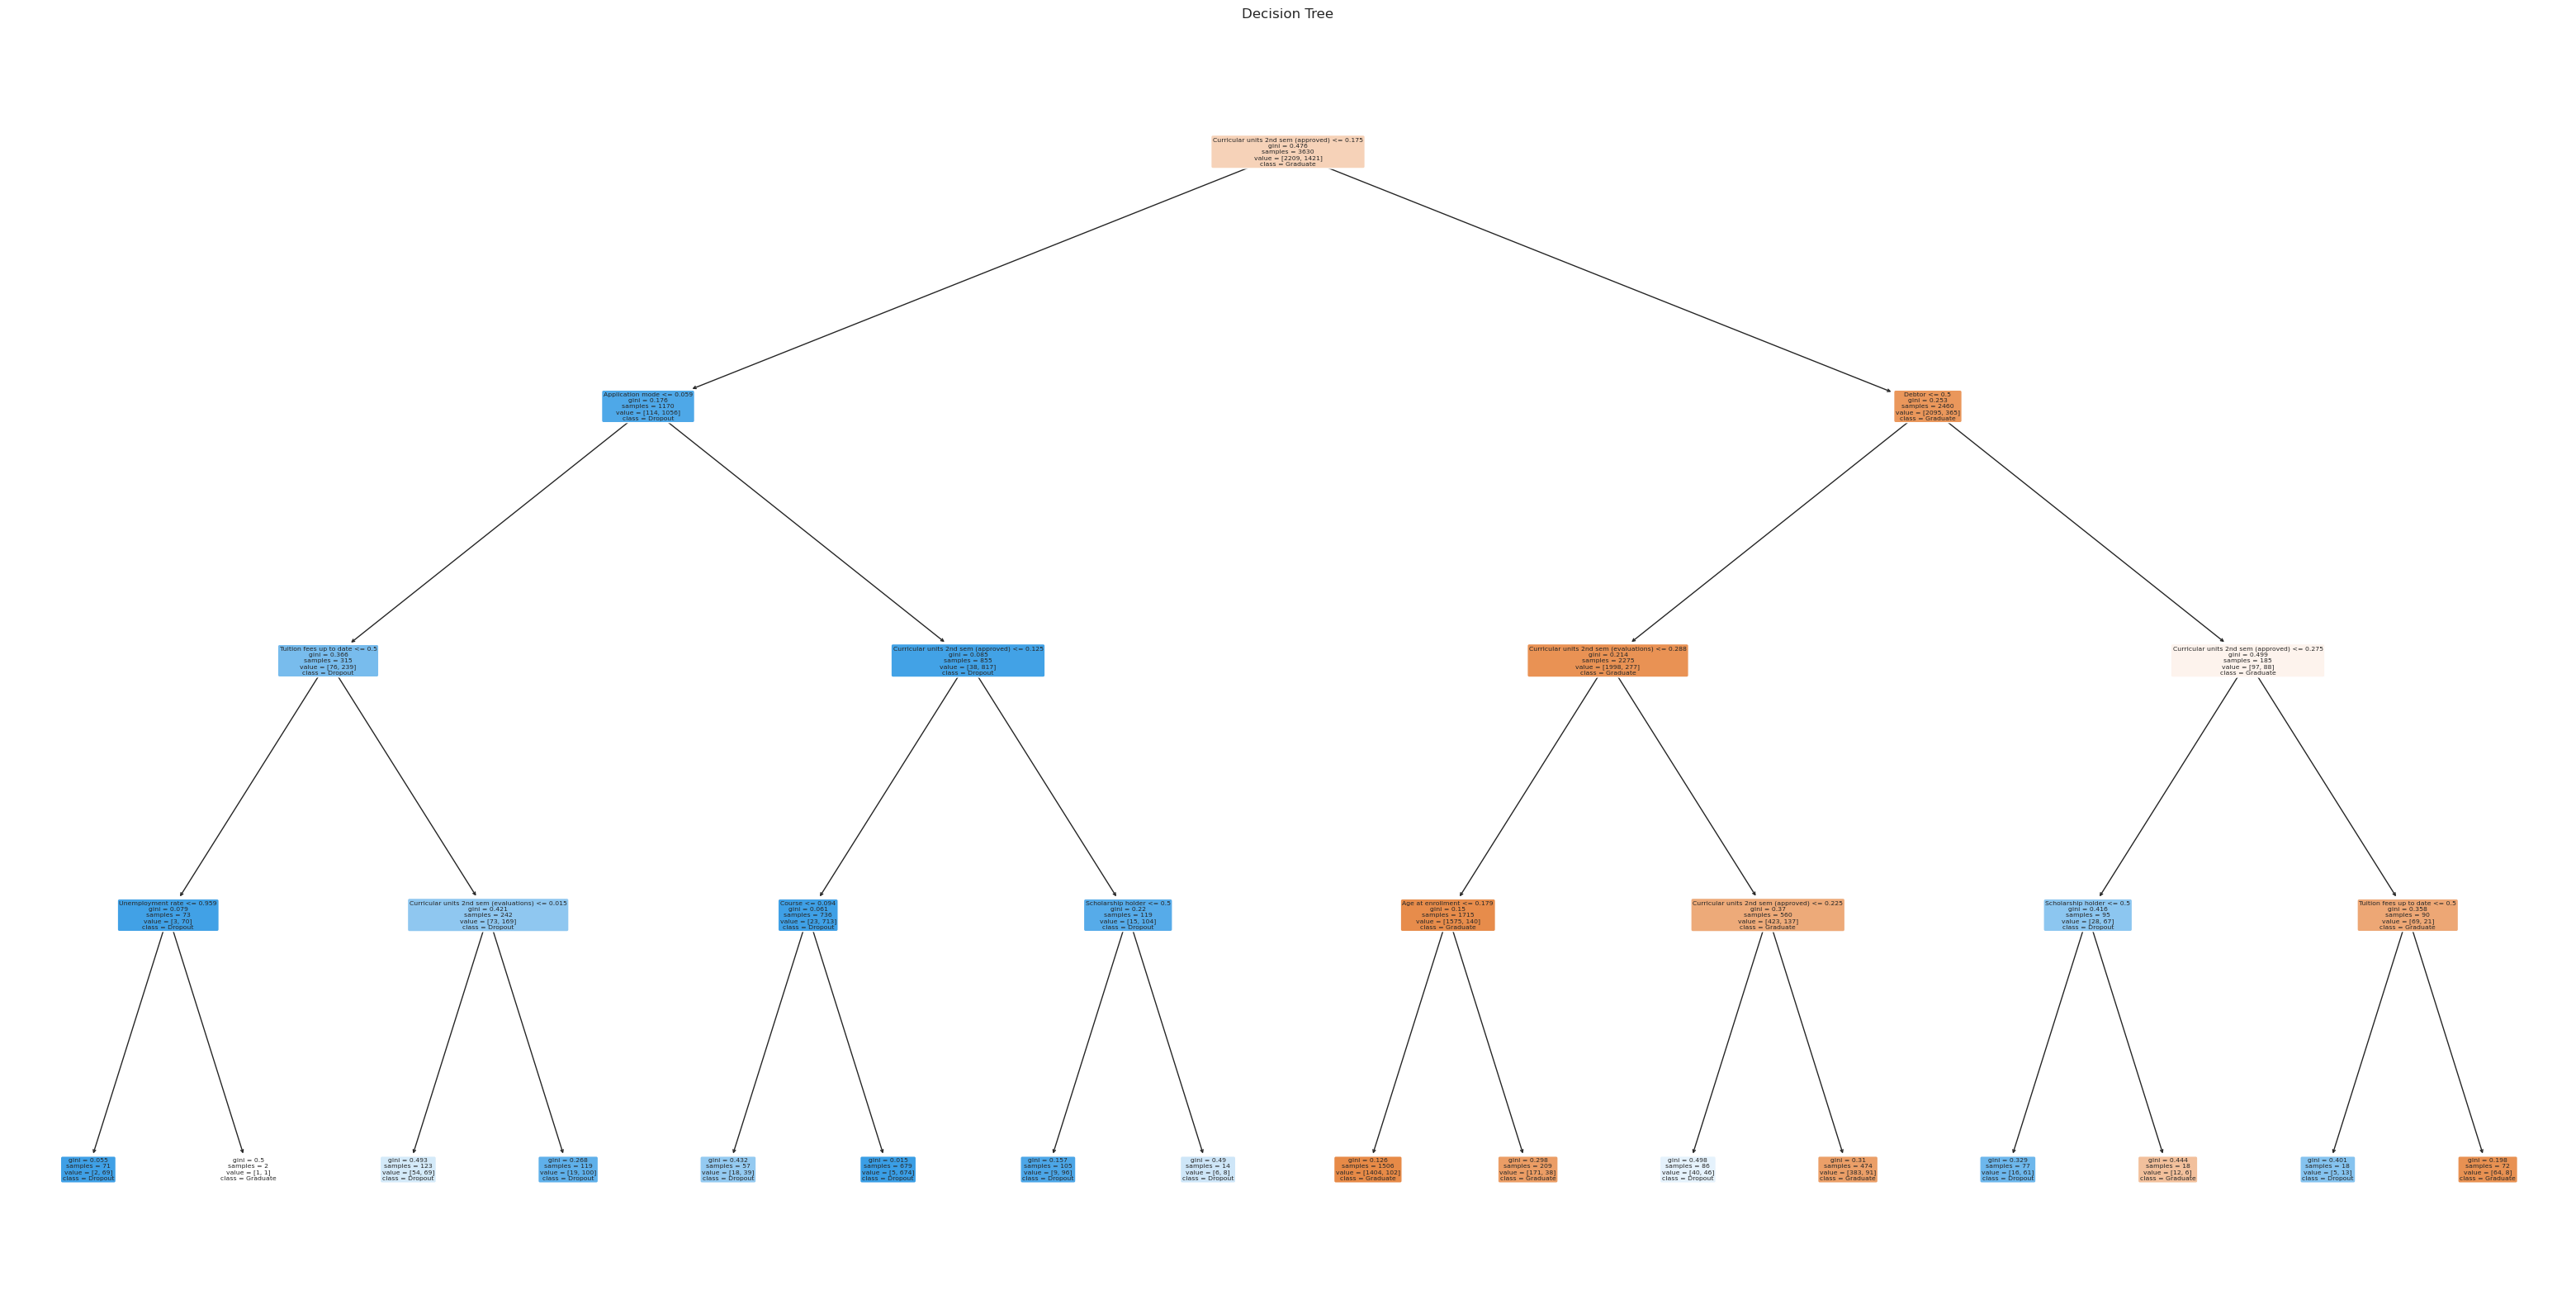

In [75]:
from sklearn import tree

plt.figure(figsize=(40,20))
tree.plot_tree(dt_fit, feature_names = X.columns.tolist(), 
               class_names=['Graduate', 'Dropout'], 
               rounded=True, filled=True)

plt.title('Decision Tree')

plt.show()

Visualize as text to make it easier to read.

In [76]:
# access export_text module from sklearn
from sklearn.tree import export_text

In [77]:
dt_text = export_text(dt_fit, feature_names=X.columns.tolist())
print(dt_text)

|--- Curricular units 2nd sem (approved) <= 0.18
|   |--- Application mode <= 0.06
|   |   |--- Tuition fees up to date <= 0.50
|   |   |   |--- Unemployment rate <= 0.96
|   |   |   |   |--- class: 1.0
|   |   |   |--- Unemployment rate >  0.96
|   |   |   |   |--- class: 0.0
|   |   |--- Tuition fees up to date >  0.50
|   |   |   |--- Curricular units 2nd sem (evaluations) <= 0.02
|   |   |   |   |--- class: 1.0
|   |   |   |--- Curricular units 2nd sem (evaluations) >  0.02
|   |   |   |   |--- class: 1.0
|   |--- Application mode >  0.06
|   |   |--- Curricular units 2nd sem (approved) <= 0.13
|   |   |   |--- Course <= 0.09
|   |   |   |   |--- class: 1.0
|   |   |   |--- Course >  0.09
|   |   |   |   |--- class: 1.0
|   |   |--- Curricular units 2nd sem (approved) >  0.13
|   |   |   |--- Scholarship holder <= 0.50
|   |   |   |   |--- class: 1.0
|   |   |   |--- Scholarship holder >  0.50
|   |   |   |   |--- class: 1.0
|--- Curricular units 2nd sem (approved) >  0.18
|   |---

DT Test Accuracy: 0.888  
DT Test Recall: 0.797  
DT Test Precision: 0.906  
DT Test F1: 0.848  

Logistic Test Accuracy: 0.907  
Logistic Test Recall: 0.840  
Logistic Test Precision: 0.916  
Logistic Test F1: 0.876

Both models produce similar results, however, with Recall and F1 being lower on the Decision Tree model than the Logistic model, this analysis indicates that the logistic regression model performs slightly better than the decision tree model.

# Random Forest

One last model I would like to try is the random forest to see if I can improve upon the results of the decision tree model. The random forest will help by reducing the randomness of the decision tree and provide reduced sensitivity to noise in the data.

## Access Solution Algorithm

Instantiate the solution algorithm with a max depth of 5.

In [78]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(max_depth=5)
rf_model

RandomForestClassifier(max_depth=5)

## Build the Model

Create the model with 3 splits and max depth from 2-5, and max features from 1-8. Produce accuracy, recall, precision, and f1 scoring metrics.

In [79]:
kf3 = KFold(n_splits=3, shuffle=True, random_state=1)
params = {'max_depth': [2, 3, 4, 5],
'max_features': [1, 2, 3, 4, 5, 6, 8]}
grid_search = GridSearchCV(rf_model, param_grid=params, cv=kf3,
scoring=('accuracy', 'recall', 'precision', 'f1'),
refit=False, return_train_score=True)
grid_search.fit(X,y)

GridSearchCV(cv=KFold(n_splits=3, random_state=1, shuffle=True),
             estimator=RandomForestClassifier(max_depth=5),
             param_grid={'max_depth': [2, 3, 4, 5],
                         'max_features': [1, 2, 3, 4, 5, 6, 8]},
             refit=False, return_train_score=True,
             scoring=('accuracy', 'recall', 'precision', 'f1'))

Display the results

In [80]:
# Adds results to a data frame
rf_results = pd.DataFrame(grid_search.cv_results_).round(3)
rf_results = rf_results.drop(['params'], axis='columns')

In [81]:
# Select relevant columns
rf_summary = rf_results[['param_max_depth', 'param_max_features', 'mean_test_accuracy',
'mean_test_recall', 'mean_test_precision', 'mean_test_f1', 'mean_train_accuracy',
'mean_train_recall', 'mean_train_precision', 'mean_train_f1']]

# Shorten column names for readability
rf_summary = rf_summary.rename(columns= {
'param_max_depth': 'depth',
'param_max_features': 'features',
'mean_test_accuracy': 'test_accuracy',
'mean_test_recall': 'test_recall',
'mean_test_precision': 'test_precision',
'mean_test_f1': 'test_f1',
'mean_train_accuracy': 'train_accuracy',
'mean_train_recall': 'train_recall',
'mean_train_precision': 'train_precision',
'mean_train_f1': 'train_f1'})

# Add columns to quickly assess varance in train vs. test metrics
rf_summary['accuracy_variance'] = abs(rf_summary['train_accuracy'] - rf_summary['test_accuracy'])
rf_summary['recall_variance'] = abs(rf_summary['train_recall'] - rf_summary['test_recall'])
rf_summary['precision_variance'] = abs(rf_summary['train_precision'] - rf_summary['test_precision'])
rf_summary['f1_variance'] = abs(rf_summary['train_f1'] - rf_summary['test_f1'])
rf_summary

,depth,features,test_accuracy,test_recall,test_precision,test_f1,train_accuracy,train_recall,train_precision,train_f1,accuracy_variance,recall_variance,precision_variance,f1_variance
0,2,1,0.761,0.410,0.952,0.573,0.766,0.416,0.970,0.580,0.005,0.006,0.018,0.007
1,2,2,0.833,0.617,0.936,0.743,0.832,0.614,0.936,0.741,0.001,0.003,0.000,0.002
2,2,3,0.859,0.708,0.912,0.797,0.862,0.710,0.918,0.801,0.003,0.002,0.006,0.004
3,2,4,0.869,0.738,0.912,0.815,0.874,0.747,0.916,0.823,0.005,0.009,0.004,0.008
4,2,5,0.882,0.780,0.904,0.837,0.881,0.777,0.906,0.837,0.001,0.003,0.002,0.000
5,2,6,0.878,0.763,0.910,0.830,0.877,0.763,0.909,0.830,0.001,0.000,0.001,0.000
6,2,8,0.881,0.779,0.904,0.837,0.881,0.778,0.905,0.836,0.000,0.001,0.001,0.001
7,3,1,0.822,0.581,0.943,0.717,0.821,0.575,0.949,0.715,0.001,0.006,0.006,0.002
8,3,2,0.868,0.712,0.936,0.808,0.872,0.724,0.934,0.815,0.004,0.012,0.002,0.007
9,3,3,0.879,0.762,0.915,0.831,0.884,0.770,0.921,0.839,0.005,0.008,0.006,0.008


Choose the model with a depth of 4 and 6 features, as it is the simplest model with high fit metrics and little variance between the train and test data.

In [82]:
rf_model = RandomForestClassifier(max_depth=4, max_features=6)
rf_model.fit(X,y)

RandomForestClassifier(max_depth=4, max_features=6)

In [83]:
y_fit = rf_model.predict(X)
y_fit[0:19]

array([1., 0., 1., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 1., 0.,
       0., 0.])

Display fit metrics.

In [84]:
print ('Accuracy: %.3f' % accuracy_score(y, y_fit))
print ('Recall: %.3f' % recall_score(y, y_fit))
print ('Precision: %.3f' % precision_score(y, y_fit))
print ('F1: %.3f' % f1_score(y, y_fit))

Accuracy: 0.894
Recall: 0.808
Precision: 0.912
F1: 0.857


Compare the results of all 3 models.

Random Forest Accuracy: 0.896  
Random Forest Recall: 0.803  
Random Forest Precision: 0.922  
Random Forest F1: 0.858

DT Test Accuracy: 0.888  
DT Test Recall: 0.797  
DT Test Precision: 0.906  
DT Test F1: 0.848  

Logistic Test Accuracy: 0.907  
Logistic Test Recall: 0.840  
Logistic Test Precision: 0.916  
Logistic Test F1: 0.876

# Conclusion

Based on the results of this analysis, the logistic regression model produces the best overall fit metrics and is the optimal supervised machine learning model to accurately predict student dropouts in this sample population. The logistic regression model accurately predicts 90% of student dropouts and can be used to target communications and allocate resources to help prevent students at risk from dropping out. It is important to note that this dataset is limited to a single university and only two semesters' worth of data, and the results may not generalize to other institutions. In addition, the lower recall scores on all three models suggest that additional features, including student income factors, housing status (on or off campus), grade point average, employment status, and even faculty data, could be added to help improve the accuracy and reliability of the results to produce fewer false negative results. 